### 4.2 Scikit-Learn

- Three fundamental objects in scikit-learn are Estimators, Transformers, and Predictors
- **Estimators:** Any object that can estimate some parameters based on a dataset is called an estimator. 
- **Transformers:** Some estimators can also transform data. These estimators are known as transformers and implement transform() method to perform the transformation of data
- **Predictors:** Some estimators can make predictions given a data. These estimators are known as predictors and implement predict() method to perform prediction

In [51]:
from sklearn import datasets
iris = datasets.load_iris()

In [52]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [53]:
print(iris.DESCR[:500])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= =====


In [54]:
print(iris.data[:10], iris.target[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] [0 0 0 0 0 0 0 0 0 0]


In [55]:
import numpy as np
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

### 4.3 Test Set for Model Assesment

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=100, test_size=0.2, stratify=iris.target)
print(f'X_train_shape: {X_train.shape}')
print(f'X_test_shape: {X_test.shape}')
print(f'y_train_shape: {y_train.shape}')
print(f'y_test_shape: {y_test.shape}')

X_train_shape: (120, 4)
X_test_shape: (30, 4)
y_train_shape: (120,)
y_test_shape: (30,)


### 4.5 Data Visualization

In [57]:
import pandas as pd
X_train_df = pd.DataFrame(X_train, columns=iris.feature_names)
y_train_df = pd.DataFrame(y_train, columns=['class'])
X_y_train_df = pd.concat([X_train_df, y_train_df], axis=1)

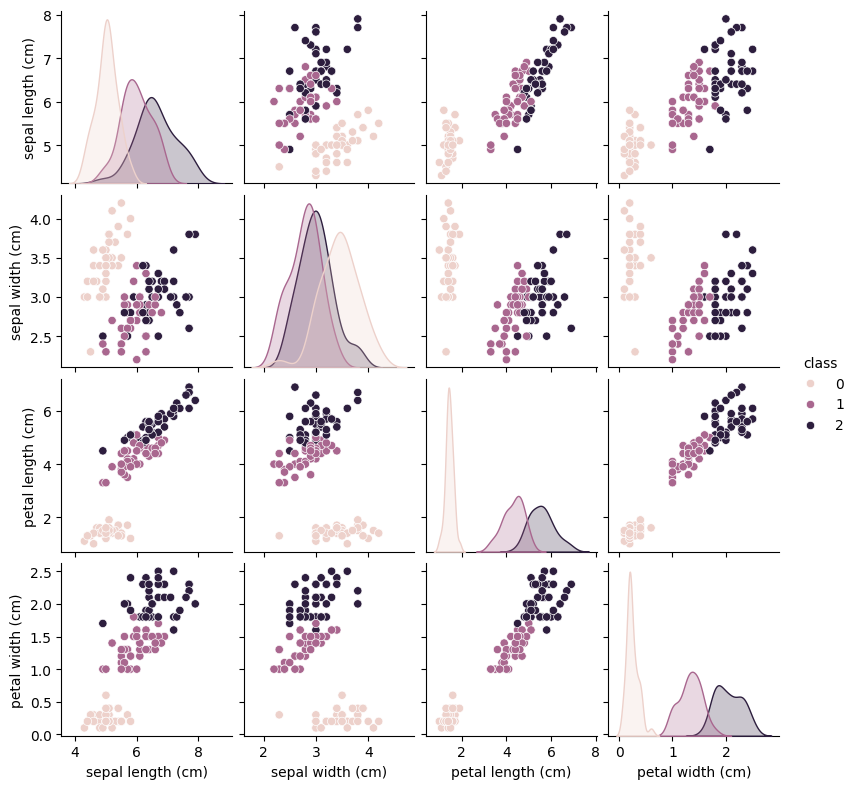

In [58]:
import seaborn as sns
sns.pairplot(X_y_train_df, hue='class', height=2)

### 4.6 Feature Scaling (Normalization)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [60]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
print(X_test_scaled.mean(axis=0))
print(X_test_scaled.std(axis=0))

[-0.20547406 -0.25637284 -0.03844742 -0.07491371]
[0.94499306 1.07303169 0.94790626 0.94534006]


In [62]:
np.savez('data/iris_train_scaled', X=X_train_scaled, y=y_train)
np.savez('data/iris_test_scaled', X=X_test_scaled, y=y_test)

### 4.7 Model Training

In [69]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN(n_neighbors=3)

In [70]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### 4.8 Prediction Using the Trained Model

In [74]:
# method chaining
y_test_predictions = KNN(n_neighbors=3).fit(X_train_scaled, y_train).predict(X_test_scaled)
print(f'knn predicts: {iris.target_names[y_test_predictions]}')

knn predicts: ['versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor']


### 4.9 Model Evaluation (Error Estimation)

In [78]:
errors = (y_test_predictions != y_test)
errors

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False])

In [81]:
error_est = sum(errors) / errors.size
print(f'The error rate estimate is: {error_est}')
print(f'The accuracy is {1-error_est}')

The error rate estimate is: 0.1
The accuracy is 0.9


In [82]:
from sklearn.metrics import accuracy_score
print(f'The accuracy is {accuracy_score(y_test, y_test_predictions)}')

The accuracy is 0.9


In [83]:
print(f'The accuracy is {knn.score(X_test_scaled, y_test)}')

The accuracy is 0.9
